# 講談社「Pythonではじめるベイズ機械学習入門」第3章 回帰モデル

## 3.6 ガウス過程回帰モデル：ガウス尤度

In [1]:
using Distributions
using Plots
using GaussianProcesses

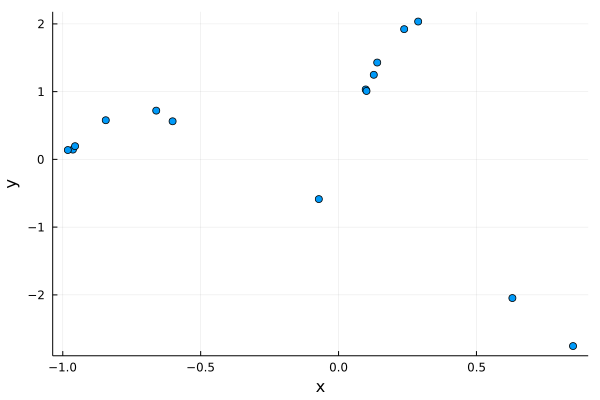

In [2]:
true_func(x) = 1.5 * exp.(x) .* sin.(2 * pi * x)

function generate_train_dataset(N)
    x = rand(Uniform(-1, 1), N)
    y = true_func(x) .+ 0.1 * rand(N)
    return x, y
end

function visualize_train_dataset(x, y)
    p = scatter(x, y, xlabel="x", ylabel="y", label=:none)
    return p
end

N = 15
x_data, y_data = generate_train_dataset(N)
p = visualize_train_dataset(x_data, y_data)

In [3]:
μ = MeanZero()
kernel = SE(0.0, 0.0)
gp = GP(x_data, y_data, μ, kernel)

GP Exact object:
  Dim = 1
  Number of observations = 15
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[0.850206789225662 0.2886552420370696 … 0.6302872740047243 -0.6017592426201159]
  Output observations = [-2.7556450631248786, 2.034600176682819, 1.2484592086856054, 1.4293781170838447, 0.1440782099438866, 0.5778798713300699, 1.9223629280095038, -0.5862102656677428, 1.032179540832235, 0.13801169084094014, 1.0096384702966936, 0.719552890789728, 0.1948924663827995, -2.0470947684282623, 0.5623432845020222]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -238.579

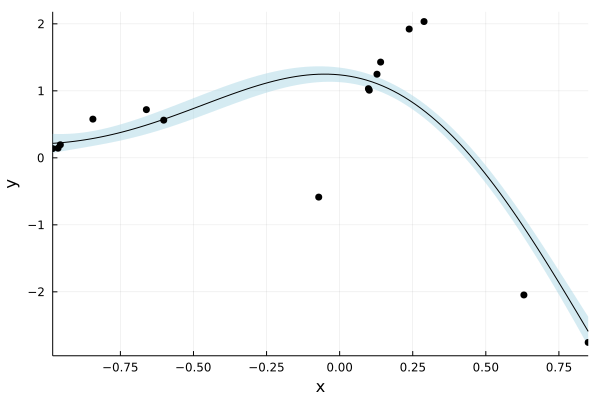

In [4]:
plot(gp; xlabel="x", ylabel="y", legend=:none)

In [5]:
using Optim
optimize!(gp) 

LinearAlgebra.PosDefException(6)


 * Status: success

 * Candidate solution
    Final objective value:     1.532266e+01

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 1.64e-09 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.77e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.31e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.07e-14 ≰ 0.0e+00
    |g(x)|                 = 1.14e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    10
    f(x) calls:    37
    ∇f(x) calls:   37


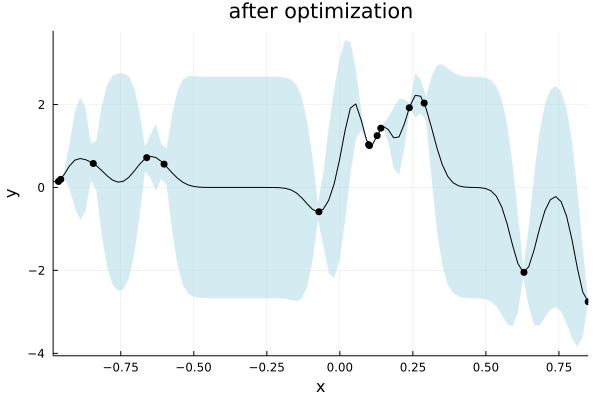

In [6]:
plot(gp; xlabel="x", ylabel="y", label=:none, title="after optimization")

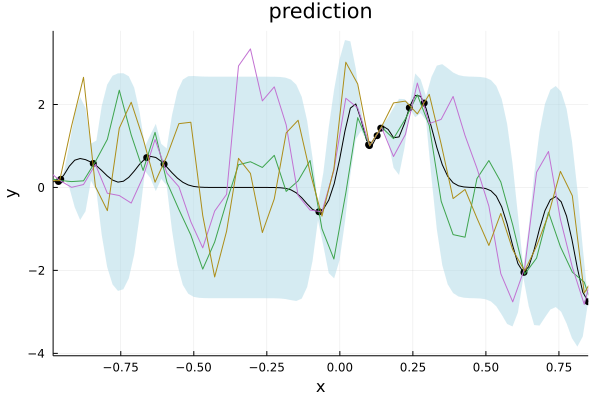

In [7]:
x_new = range(-1, 1, length=50)
pred = rand(gp, x_new, 3)
plot!(x_new, pred, xlabel="x", ylabel="y", label=:none, title="prediction")